In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_1samp


In [60]:
df = pd.read_csv("air traffic.csv")

columns_to_clean = ["Dom_Pax", "Int_Pax", "Pax", "Dom_Flt", "Int_Flt", "Flt", 
                    "Dom_RPM", "Int_RPM", "RPM", "Dom_ASM", "Int_ASM", "ASM"]

for col in columns_to_clean:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    float64
 3   Int_Pax  249 non-null    float64
 4   Pax      249 non-null    float64
 5   Dom_Flt  249 non-null    float64
 6   Int_Flt  249 non-null    float64
 7   Flt      249 non-null    float64
 8   Dom_RPM  249 non-null    float64
 9   Int_RPM  249 non-null    float64
 10  RPM      249 non-null    float64
 11  Dom_ASM  249 non-null    float64
 12  Int_ASM  249 non-null    float64
 13  ASM      249 non-null    float64
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(15), int64(2)
memory usage: 33.2 KB


In [61]:
print(df.describe())


              Year       Month       Dom_Pax       Int_Pax           Pax  \
count   249.000000  249.000000  2.490000e+02  2.490000e+02  2.490000e+02   
mean   2012.879518    6.445783  5.520971e+07  7.392209e+06  6.260192e+07   
std       6.002817    3.442803  1.044055e+07  2.020273e+06  1.229211e+07   
min    2003.000000    1.000000  2.877290e+06  1.366090e+05  3.013899e+06   
25%    2008.000000    3.000000  5.098217e+07  6.395022e+06  5.766458e+07   
50%    2013.000000    6.000000  5.620010e+07  7.419187e+06  6.389913e+07   
75%    2018.000000    9.000000  6.089213e+07  8.567847e+06  6.944743e+07   
max    2023.000000   12.000000  7.537816e+07  1.243262e+07  8.781077e+07   

             Dom_Flt       Int_Flt            Flt       Dom_RPM       Int_RPM  \
count     249.000000    249.000000     249.000000  2.490000e+02  2.490000e+02   
mean   706750.710843  64736.172691  771486.883534  4.957803e+07  1.918103e+07   
std    107054.971522  12129.622461  115686.728629  1.035558e+07  5.71162

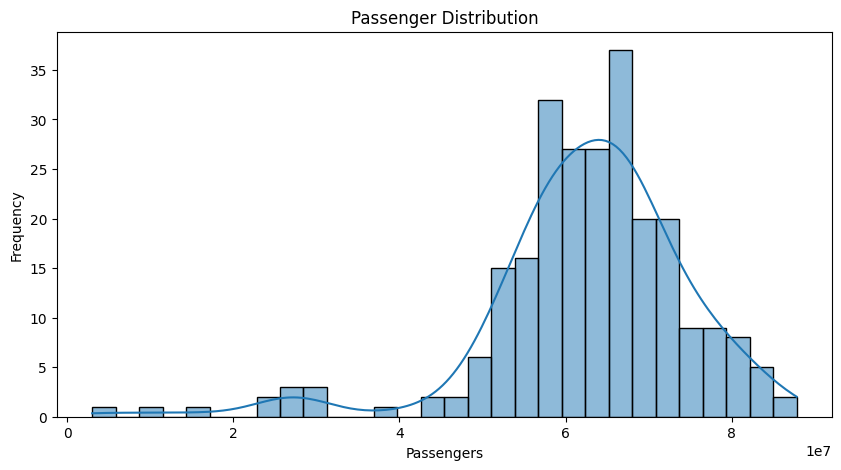

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Pax"], bins=30, kde=True)
plt.title("Passenger Distribution")
plt.xlabel("Passengers")
plt.ylabel("Frequency")
plt.show()


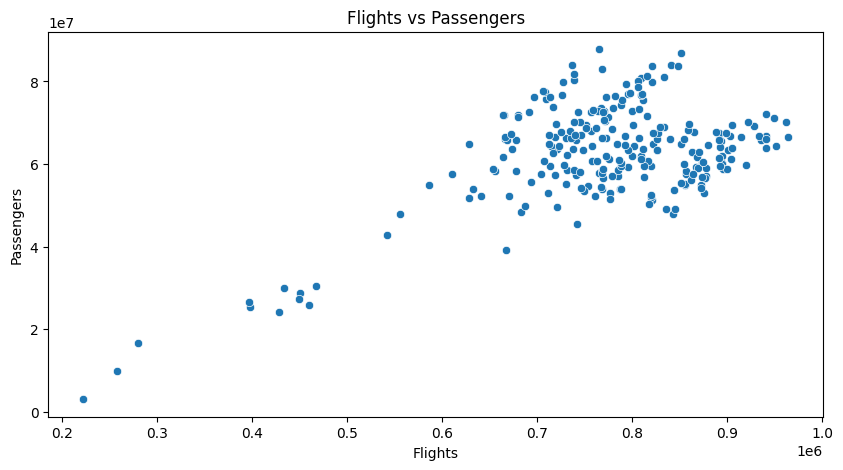

In [63]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Flt"], y=df["Pax"])
plt.title("Flights vs Passengers")
plt.xlabel("Flights")
plt.ylabel("Passengers")
plt.show()


In [64]:
X = df[["Flt"]]
y = df["Pax"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [65]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 110855922051702.88


In [66]:
t_stat, p_value = ttest_1samp(df["Pax"], 50000)
print(f"T-Test Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.5f}")


T-Test Statistic: 80.30
P-Value: 0.00000
